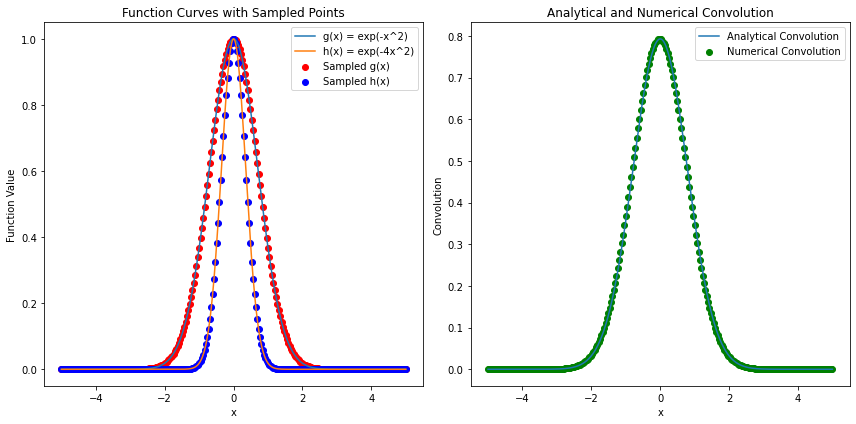

In [47]:
import numpy as np
import matplotlib.pyplot as plt

# Define the functions g(x) and h(x)
def g(x):
    return np.exp(-x**2)

def h(x):
    return np.exp(-4*x**2)

# Define the analytical convolution result
def analytical_convolution(x):
    return np.sqrt(np.pi/5)*np.exp((-x**2)*(4/5))

# Define the range of x values
x = np.linspace(-5, 5, 256)
delta = x[1] - x[0]
n = len(x)

# Sample the functions g(x) and h(x)
g_sampled = g(x)
h_sampled = h(x)

# Zero-pad the sampled functions
g_padded = np.pad(g_sampled, (0, n), mode='constant')
h_padded = np.pad(h_sampled, (0, n), mode='constant')

# Compute the DFT of the padded functions
G = np.fft.fft(g_padded, norm="ortho")
H = np.fft.fft(h_padded, norm="ortho")

# Multiply the DFTs of the functions
convolved = np.fft.ifft(G * H, norm="ortho")

# Multiply the result by delta*sqrt(n)
convolved = np.abs(convolved) * delta * np.sqrt(2*n)
convolved = convolved[int(n/2):int(-n/2)]

xp = np.linspace(-5, 5, 1000)

# Plot the function curves with scattered sampled points
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(xp, g(xp), label='g(x) = exp(-x^2)')
plt.scatter(x, g_sampled, color='red', label='Sampled g(x)')
plt.plot(xp, h(xp), label='h(x) = exp(-4x^2)')
plt.scatter(x, h_sampled, color='blue', label='Sampled h(x)')
plt.legend()
plt.xlabel('x')
plt.ylabel('Function Value')
plt.title('Function Curves with Sampled Points')

# Plot the analytical convolution with scattered numerical convolution points
plt.subplot(1, 2, 2)
plt.plot(xp, analytical_convolution(xp), label='Analytical Convolution')
plt.scatter(x, convolved[:len(x)], color='green', label='Numerical Convolution')
plt.legend()
plt.xlabel('x')
plt.ylabel('Convolution')
plt.title('Analytical and Numerical Convolution')
plt.tight_layout()
plt.show()
